<a href="https://colab.research.google.com/github/Varun-tej-reddy/Earthquake-Analysis/blob/main/Earthquake_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Real-Time Earthquake Analysis and Impact Simulation***

In [ ]:
print("🌐 Welcome to Real-Time Earthquake Analysis & Impact Simulation — Tracking the last 30 days of activity")

🌐 Welcome to Real-Time Earthquake Analysis & Impact Simulation — Tracking the last 30 days of activity


#Imports & Setup

In [ ]:
# 📚 Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

#Load & Filter Earthquake Data

In [ ]:
# 📂 Load Data
df = pd.read_csv("/content/earth_quake_30.csv")   # used usgs earthquake data
df['time'] = pd.to_datetime(df['time'], utc=True)
df = df[df['mag'] >= 4.5]  # Keep significant earthquakes

# 📆 Filter Last 7 Days (UTC)
today = pd.Timestamp.utcnow()
df_recent = df[df['time'] >= today - pd.Timedelta(days=30)]

#Extract Country Info

In [ ]:
# 🧹 Extract Country Info
def extract_country(place):
    if ',' in place:
        return place.split(',')[-1].strip()
    return place.strip()

df_recent['Country'] = df_recent['place'].apply(extract_country)

#Summary Info

In [ ]:
# 📊 Top 10 Countries
top_countries = df_recent['Country'].value_counts().head(10)

# 🔍 Summary Info
print("\n📌 Summary of Earthquake Data (Last 30 Days):")
print(f"Total Earthquakes: {len(df_recent)}")
print(f"Average Magnitude: {df_recent['mag'].mean():.2f}")
print(f"Max Magnitude: {df_recent['mag'].max()}")
most_day = df_recent['time'].dt.date.value_counts().idxmax()
print(f"Day with Most Earthquakes: {most_day}")


📌 Summary of Earthquake Data (Last 30 Days):
Total Earthquakes: 486
Average Magnitude: 4.85
Max Magnitude: 7.4
Day with Most Earthquakes: 2025-05-02


#Bar Plot - Top Countries

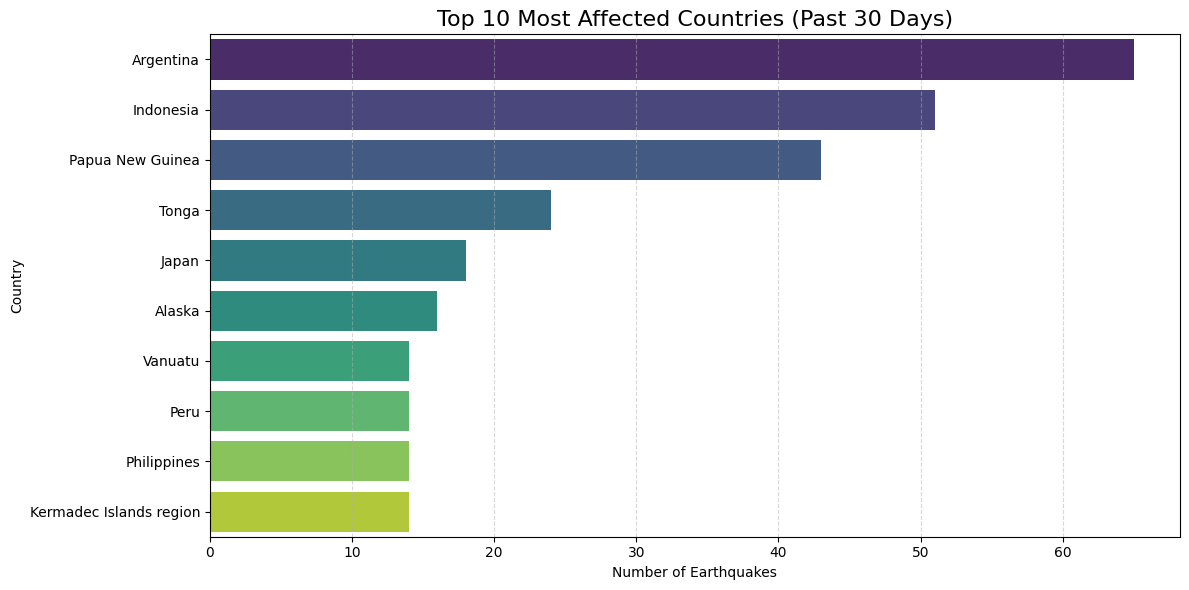

In [ ]:
# 📊 Bar Plot: Top Countries(#check "recently most affected in earthquake" in google )
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Most Affected Countries (Past 30 Days)", fontsize=16)
plt.xlabel("Number of Earthquakes")
plt.ylabel("Country")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#Heatmap - Magnitude Intensity

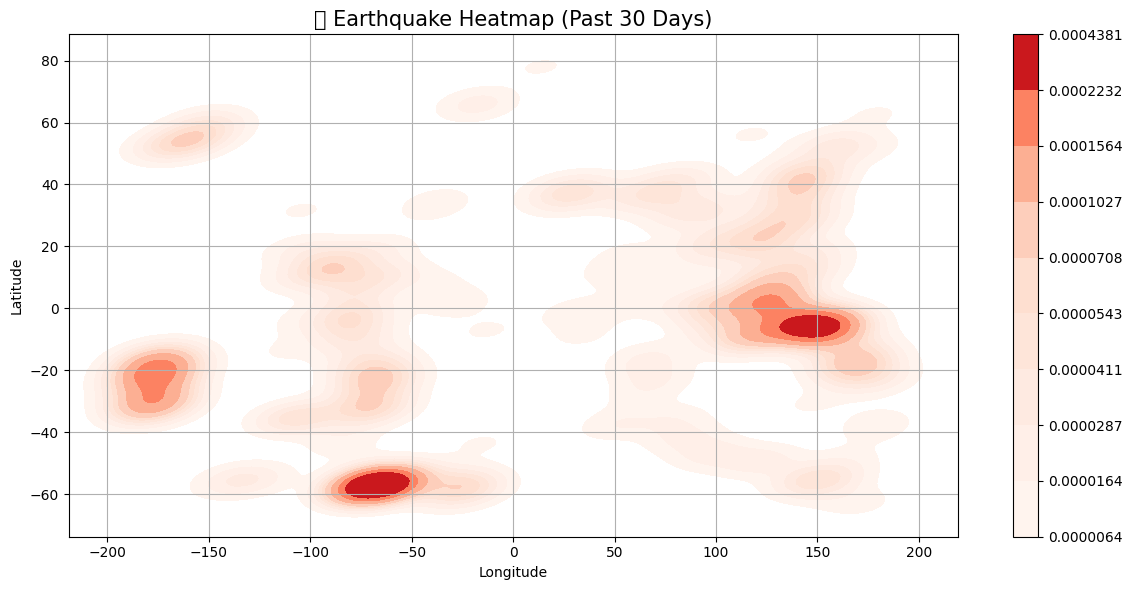

In [ ]:
# 🌡️ Heatmap: Magnitude Intensity by Location
plt.figure(figsize=(12,6))
sns.kdeplot(
    x=df_recent['longitude'],
    y=df_recent['latitude'],
    cmap="Reds", fill=True,
    cbar=True, bw_adjust=0.3, thresh=0.05
)
plt.title("🌋 Earthquake Heatmap (Past 30 Days)", fontsize=15)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# World Map

In [ ]:
# 🌍 World Map
def extract_country(place):
    if ',' in place:
        return place.split(',')[-1].strip()
    return place.strip()

df['Country'] = df['place'].apply(extract_country)

# 🌍 World Map Plot
fig = px.scatter_geo(
    df,
    lat='latitude',
    lon='longitude',
    color='mag',
    size='mag',
    hover_name='place',
    hover_data={'time': True, 'depth': True, 'mag': True, 'Country': True},
    projection='natural earth',
    title='🌍 Earthquakes in Last 30 Days',
    color_continuous_scale='thermal'
)
fig.update_geos(showcountries=True)
fig.update_layout(height=600, margin={"r":0,"t":50,"l":0,"b":0})
fig.show()

#Daily Earthquake Line Plot

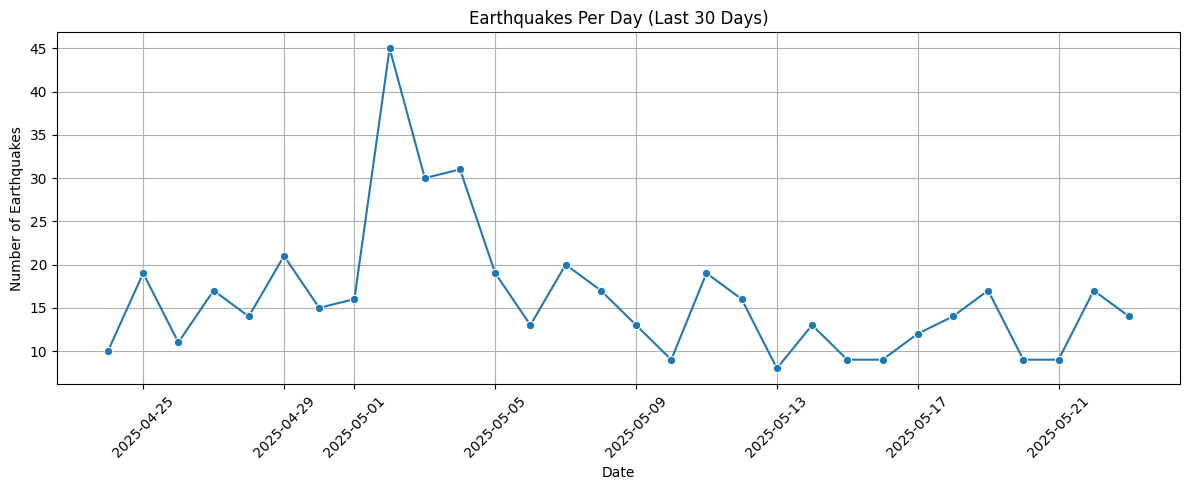

In [ ]:
# 📈 Earthquakes Per Day
daily_counts = df_recent['time'].dt.date.value_counts().sort_index()
plt.figure(figsize=(12, 5))
sns.lineplot(x=daily_counts.index, y=daily_counts.values, marker='o')
plt.xticks(rotation=45)
plt.title("Earthquakes Per Day (Last 30 Days)")
plt.xlabel("Date")
plt.ylabel("Number of Earthquakes")
plt.grid(True)
plt.tight_layout()
plt.show()

#Pie Chart - Country Share

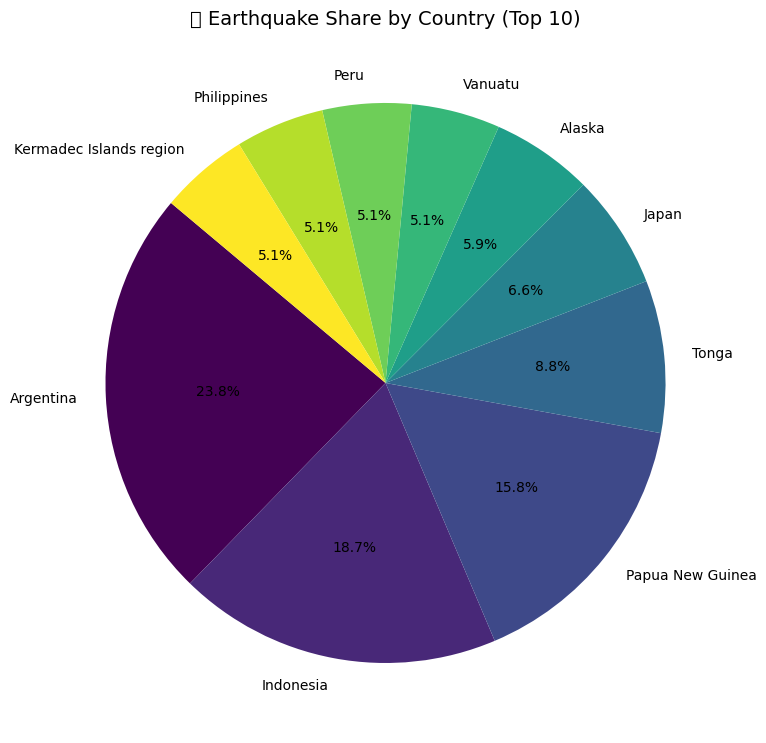

In [ ]:
# Earthquake Distribution by Country (Top 10)
plt.figure(figsize=(8,8))
top_countries.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='viridis')
plt.title("🌍 Earthquake Share by Country (Top 10)", fontsize=14)
plt.ylabel("")
plt.tight_layout()
plt.show()

#Strongest, Deepest, and Most Recent Earthquake

In [ ]:
# 💥 Strongest, Deepest, Most Recent Earthquakes
strongest = df_recent.loc[df_recent['mag'].idxmax()]
deepest = df_recent.loc[df_recent['depth'].idxmax()]
recent = df_recent.sort_values(by='time', ascending=False).iloc[0]

print("\n📍 Highlighted Earthquakes:")
print(f"🧨 Strongest: {strongest['place']} | Mag: {strongest['mag']}")
print(f"🌊 Deepest: {deepest['place']} | Depth: {deepest['depth']} km")
print(f"⏱️ Most Recent: {recent['place']} | Time: {recent['time']}")


📍 Highlighted Earthquakes:
🧨 Strongest: 2025 Drake Passage Earthquake | Mag: 7.4
🌊 Deepest: Fiji region | Depth: 616.473 km
⏱️ Most Recent: 49 km E of Caucete, Argentina | Time: 2025-05-23 20:10:19.991000+00:00


#Histogram

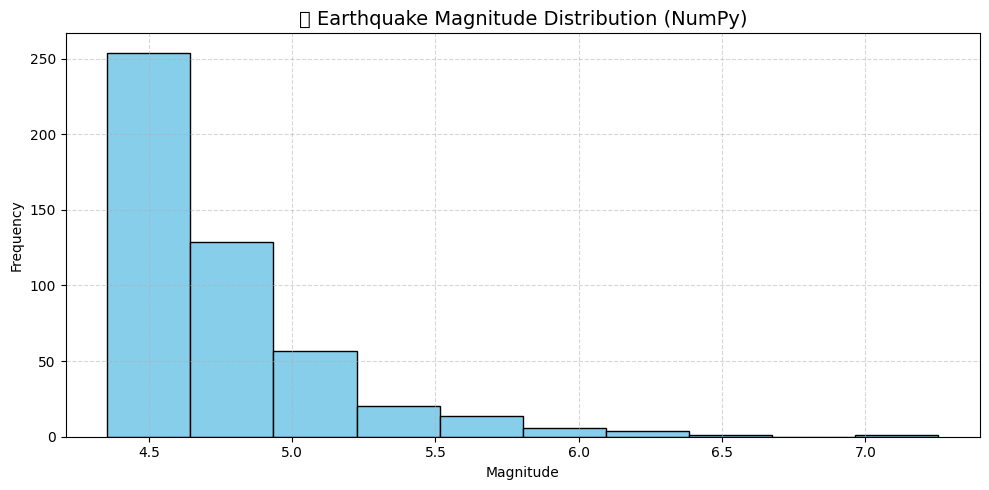

In [ ]:
# 📊 NumPy Histogram of Magnitudes
magnitudes = df_recent['mag'].to_numpy()
hist, bin_edges = np.histogram(magnitudes, bins=10)

plt.figure(figsize=(10,5))
plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), edgecolor="black", color='skyblue')
plt.title("📊 Earthquake Magnitude Distribution (NumPy)", fontsize=14)
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#  **What-If Simulator 🌍💥(Impact Simulation)**

In [ ]:
!pip install fuzzywuzzy

In [ ]:
import pandas as pd
from fuzzywuzzy import process
import numpy as np

# Assuming df is your loaded dataset with 'Country' and 'mag' columns
# df = pd.read_csv("your_data.csv")
valid_countries = sorted(df['Country'].dropna().unique())

def match_country(country, valid_countries):
    matched, _ = process.extractOne(country.lower(), [c.lower() for c in valid_countries])
    return matched.title()  # Title case for nicer print

def what_if_earthquake(country, magnitude, depth):
    country = country.strip()
    matched_country = match_country(country, valid_countries)

    if not matched_country:
        print(f"\n❌ '{country}' not found. Try exact names or close variations like 'India' or 'Burma'.\n")
        return

    print(f"\n🤔 Magnitude {magnitude} quake in {matched_country.upper()} at {depth} km depth")

    # Impact score formula with stronger magnitude impact
    score = np.clip((magnitude ** 4) / (depth + 1), 0, 1000)
    print(f"💥 Impact Score: {score:.2f}/1000")

    # Severity thresholds, adjusted for better differentiation
    if score > 500:
        print("🟥 EXTREME impact")
    elif score > 200:
        print("🟧 HIGH impact")
    elif score > 80:
        print("🟨 MODERATE impact")
    else:
        print("🟩 LOW impact")

    # Region-specific data for historical context
    region = df[df['Country'].str.lower() == matched_country.lower()]
    if not region.empty:
        max_mag = region['mag'].max()
        avg_mag = region['mag'].mean()
        print(f"\n📊 {matched_country} - Max: {max_mag} | Avg: {avg_mag:.2f}")
        if magnitude > max_mag:
            print("🚨 Strongest in last 30 days!")
        elif magnitude > avg_mag:
            print("⚠️ Above average.")
        else:
            print("✅ Normal range.")
    else:
        print("ℹ️ No recent data for this country.")

# Main interactive loop
while True:
    print("\n🌍 QuakeCheck Simulator")
    c = input("📍 Country: ")
    try:
        m = float(input("💥 Magnitude: "))
        d = float(input("🌊 Depth (km): "))
    except ValueError:
        print("⚠️ Please enter valid numbers for magnitude and depth.")
        continue

    what_if_earthquake(c, m, d)

    if input("\n🔁 Try again? (yes/no): ").strip().lower() != "yes":
        print("\n✅ Exiting. Stay safe!")
        break


🌍 QuakeCheck Simulator
📍 Country: ind
💥 Magnitude: 2
🌊 Depth (km): 3

🤔 Magnitude 2.0 quake in INDIA at 3.0 km depth
💥 Impact Score: 4.00/1000
🟩 LOW impact

📊 India - Max: 4.6 | Avg: 4.60
✅ Normal range.

🔁 Try again? (yes/no): yes

🌍 QuakeCheck Simulator
📍 Country: burma
💥 Magnitude: 10
🌊 Depth (km): 50

🤔 Magnitude 10.0 quake in BURMA (MYANMAR) at 50.0 km depth
💥 Impact Score: 196.08/1000
🟨 MODERATE impact

📊 Burma (Myanmar) - Max: 5.1 | Avg: 4.90
🚨 Strongest in last 30 days!

🔁 Try again? (yes/no): yes

🌍 QuakeCheck Simulator
📍 Country: africa
💥 Magnitude: 12
🌊 Depth (km): 67

🤔 Magnitude 12.0 quake in COSTA RICA at 67.0 km depth
💥 Impact Score: 304.94/1000
🟧 HIGH impact

📊 Costa Rica - Max: 4.5 | Avg: 4.50
🚨 Strongest in last 30 days!

🔁 Try again? (yes/no): no

✅ Exiting. Stay safe!
